In [363]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

## Import Libraries and Data

In [364]:
winequality = pd.read_csv("winequality-red.csv", usecols= ["alcohol", "volatile acidity", "sulphates", "citric acid", "total sulfur dioxide", "fixed acidity", "quality"])
winequality.head()

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,34.0,0.56,9.4,5
1,7.8,0.88,0.00,67.0,0.68,9.8,5
2,7.8,0.76,0.04,54.0,0.65,9.8,5
3,11.2,0.28,0.56,60.0,0.58,9.8,6
4,7.4,0.70,0.00,34.0,0.56,9.4,5


## Exploratory Data Analysis (EDA) & Data Preprocessing

### Missing Value

In [365]:
winequality.info()
winequality.isna().sum()
winequality.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   total sulfur dioxide  1599 non-null   float64
 4   sulphates             1599 non-null   float64
 5   alcohol               1599 non-null   float64
 6   quality               1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


240

### Menghapus Data Duplikat

In [366]:
duplicated = winequality[winequality.duplicated()]
duplicated

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol,quality
4,7.4,0.700,0.00,34.0,0.56,9.4,5
11,7.5,0.500,0.36,102.0,0.80,10.5,5
27,7.9,0.430,0.21,37.0,0.91,9.5,5
40,7.3,0.450,0.36,87.0,0.83,10.5,5
65,7.2,0.725,0.05,11.0,0.39,10.9,5
...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,20.0,0.54,10.1,5
1564,7.2,0.695,0.13,20.0,0.54,10.1,5
1567,7.2,0.695,0.13,20.0,0.54,10.1,5
1581,6.2,0.560,0.09,32.0,0.60,11.3,5


In [367]:
winequality.drop_duplicates(inplace=True)

In [368]:
winequality.shape

(1359, 7)

### Asumsi Analisis Regresi

Uji Asumsi klasik adalah analisis yang dilakukan untuk menilai apakah di dalam sebuah model regresi linear Ordinary Least Square (OLS) terdapat masalah-masalah asumsi klasik.

#### Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

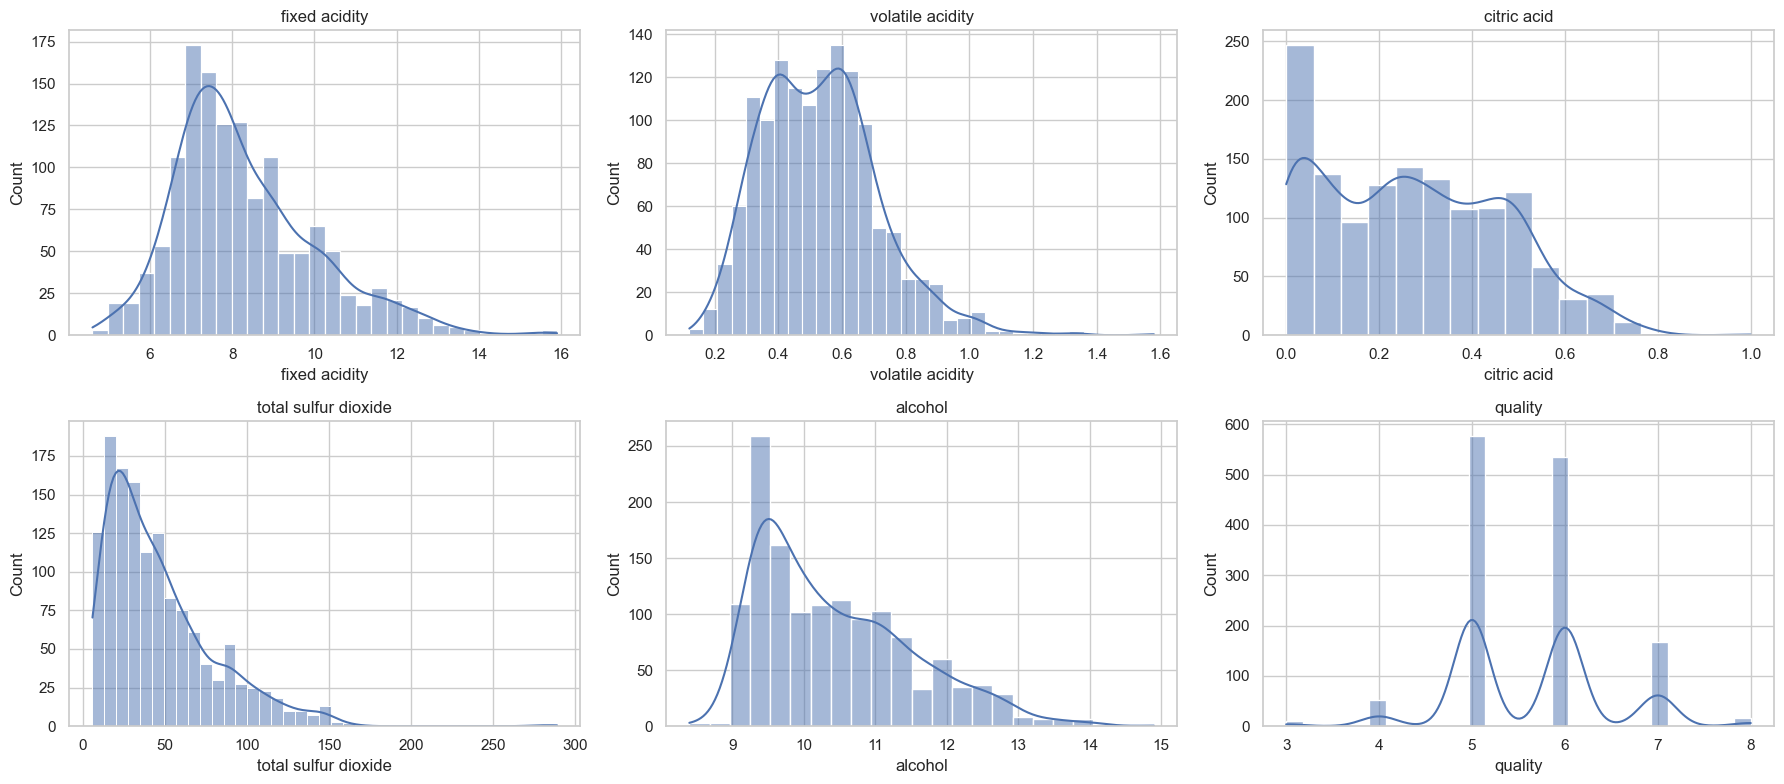

In [369]:
winequality.columns = winequality.columns.str.strip()

cols = ["fixed acidity", "volatile acidity", "citric acid",
        "total sulfur dioxide", "alcohol", "quality"]  # 5 variabel

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.ravel()

for i, c in enumerate(cols):
    sns.histplot(winequality[c], kde=True, ax=axes[i])
    axes[i].set_title(c)

# Sembunyikan slot terakhir jika tidak terpakai
if len(cols) < len(axes):
    axes[len(cols)].set_visible(False)

plt.tight_layout(); plt.show()


Syarat distribusi normal pada data hanya diberlakukan pada variabel Y, akan tetapi kita akan melihat sebaran data dari semua varaibel. 

Terlihat dari histogram, bahwa variabel y quality tidak berdistribusi normal karena tidak membentuk lonceng, sedangkan pada variabel X yang berdistribusi normal hanya fixed acidity karena grifik ditribusinya membentuk lonceng dan variabel X lainnya seperti volatile acidity, citric acid, total sulfur dioxide, dan alkohol tidak berdistribusi normal.

Yang bentuknya simetris hanyalah fixed acidity

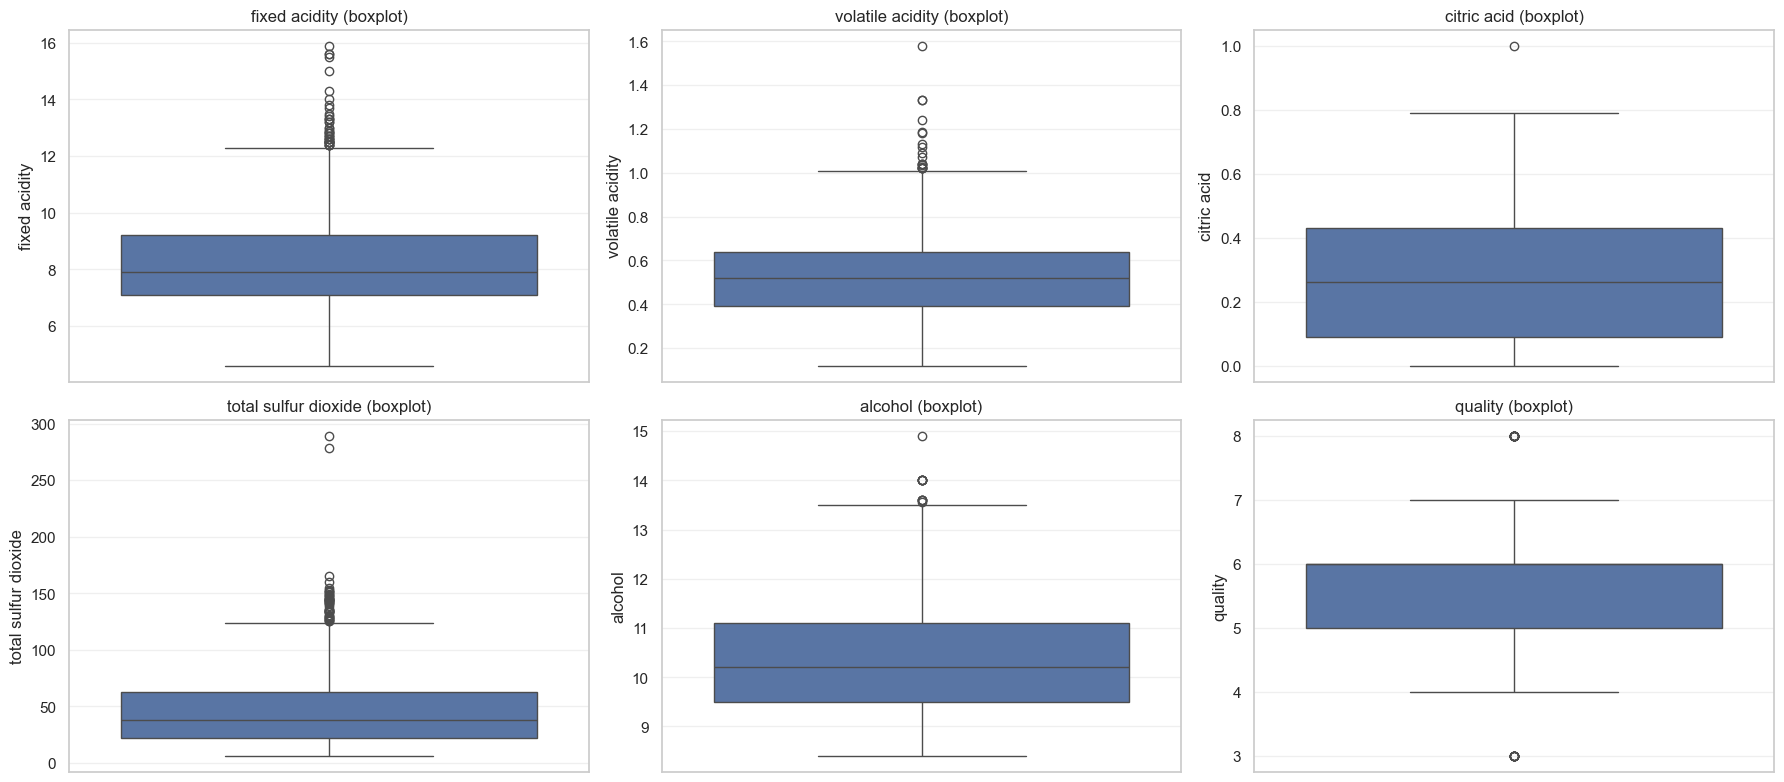

In [370]:
winequality.columns = winequality.columns.str.strip()

cols = ["fixed acidity", "volatile acidity", "citric acid",
        "total sulfur dioxide", "alcohol", "quality"]  # 5 variabel

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.ravel()

for i, c in enumerate(cols):
    sns.boxplot(y=winequality[c], ax=axes[i])     # pakai y= biar boxplot vertikal
    axes[i].set_title(f"{c} (boxplot)")
    axes[i].grid(True, axis='y', alpha=0.3)

# Sembunyikan slot kosong terakhir (karena grid 6 slot, plot 5)
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

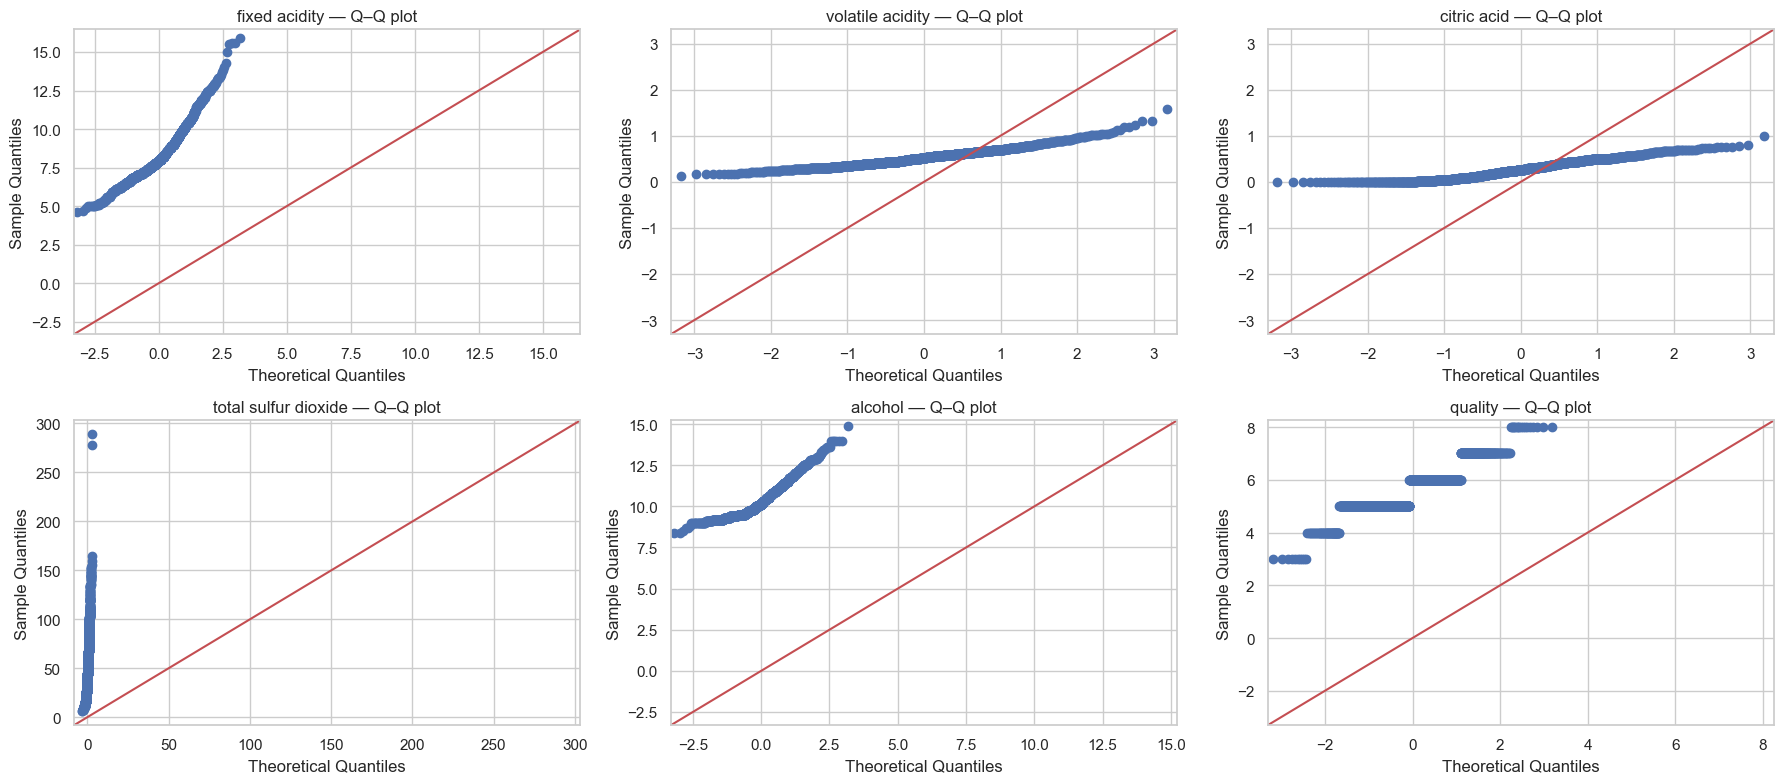

In [371]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import statsmodels.api as sm

winequality.columns = winequality.columns.str.strip()

cols = ["fixed acidity", "volatile acidity", "citric acid",
        "total sulfur dioxide", "alcohol", "quality"]  # 5 variabel
        

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.ravel()

for i, c in enumerate(cols):
    sm.qqplot(winequality[c].dropna(), line='45', ax=axes[i])
    axes[i].set_title(f"{c} — Q–Q plot")

# Sembunyikan slot kosong terakhir
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(); plt.show()


Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [372]:
winequality.columns = winequality.columns.str.strip()

cols = ["fixed acidity", "volatile acidity", "citric acid",
        "total sulfur dioxide", "alcohol", "quality"]

for c in cols:
    x = winequality[c].dropna()
    # (Opsional) subsample agar tidak terlalu sensitif & lebih cepat:
    x_test = x.sample(min(len(x), 500), random_state=0)
    W, p = shapiro(x_test)
    print(f"{c:22s}  W={W:.3f}  p={p:.4g}")


fixed acidity           W=0.952  p=1.302e-11
volatile acidity        W=0.975  p=1.299e-07
citric acid             W=0.960  p=2.032e-10
total sulfur dioxide    W=0.841  p=5.718e-22
alcohol                 W=0.916  p=4.733e-16
quality                 W=0.855  p=4.713e-21


#### Uji Linearitas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

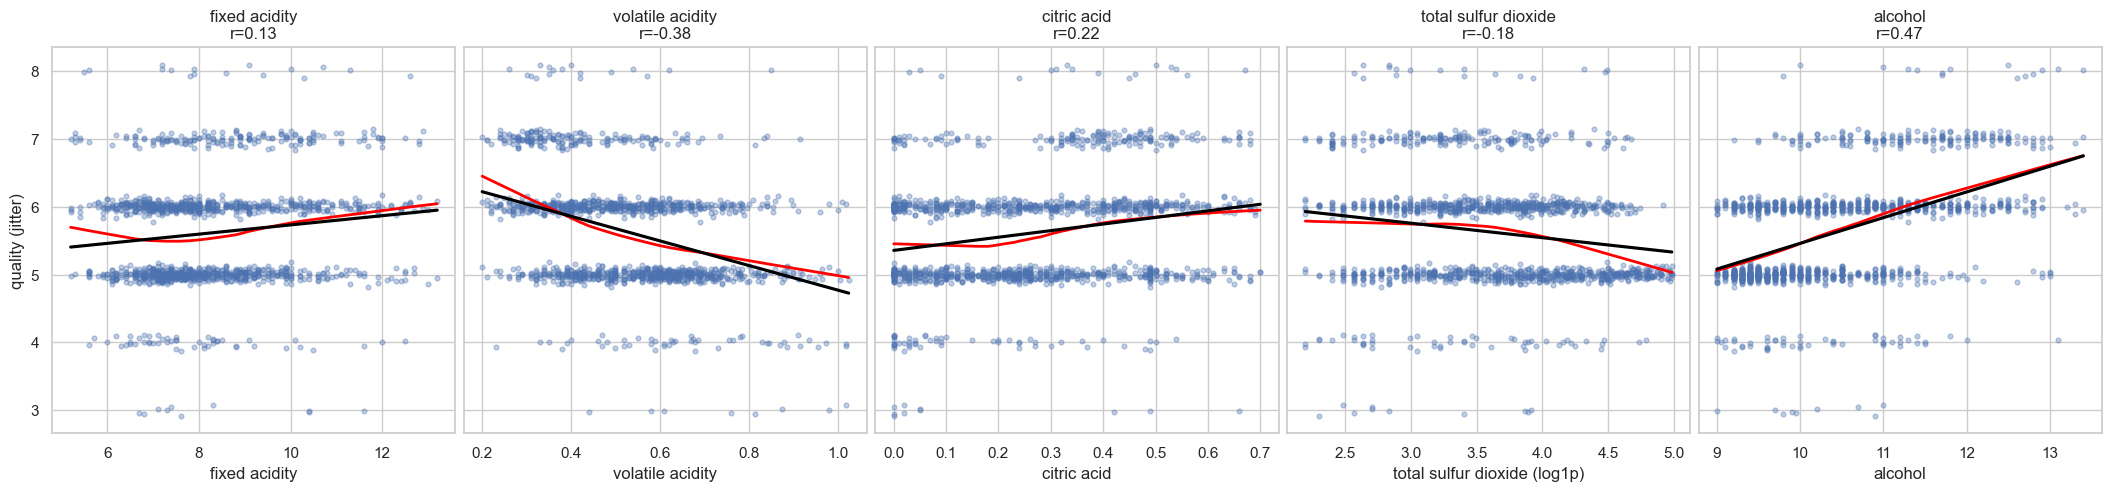

In [373]:
sns.set_theme(style="whitegrid")

winequality.columns = winequality.columns.str.strip()

y = winequality["quality"].to_numpy()

rng = np.random.default_rng(42)
y_jit = y + rng.normal(0, 0.06, size=len(y))

plots = [
    ("fixed acidity", None),
    ("volatile acidity", None),
    ("citric acid", None),
    ("total sulfur dioxide", "log1p"),
    ("alcohol", None),
]

fig, axes = plt.subplots(1, len(plots), figsize=(21, 4.8), sharey=True, constrained_layout=True)

for ax, (c, tf) in zip(axes, plots):
    x = winequality[c].to_numpy()

    # Transform untuk fitur skew
    if tf == "log1p":
        x = np.log1p(x)
        xlabel = f"{c} (log1p)"
    else:
        xlabel = c

    # Trim outlier ekstrem (1–99%) agar lowess tidak “liar”
    lo, hi = np.percentile(x, [1, 99])
    mask = (x >= lo) & (x <= hi)

    sns.regplot(
        x=x[mask], y=y_jit[mask],
        lowess=True,
        scatter_kws={"s": 12, "alpha": 0.35},
        line_kws={"color": "red", "lw": 2},
        ax=ax
    )
    sns.regplot(
        x=x[mask], y=y_jit[mask],
        lowess=False, ci=None, scatter=False, color="black", ax=ax
    )

    r = np.corrcoef(x[mask], y[mask])[0, 1]
    ax.set_title(f"{c}\nr={r:.2f}")
    ax.set_xlabel(xlabel)

axes[0].set_ylabel("quality (jitter)")
plt.show()


#### Uji Multikolinearitas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel bebas dalam suatu model regresi linear berganda

<Axes: >

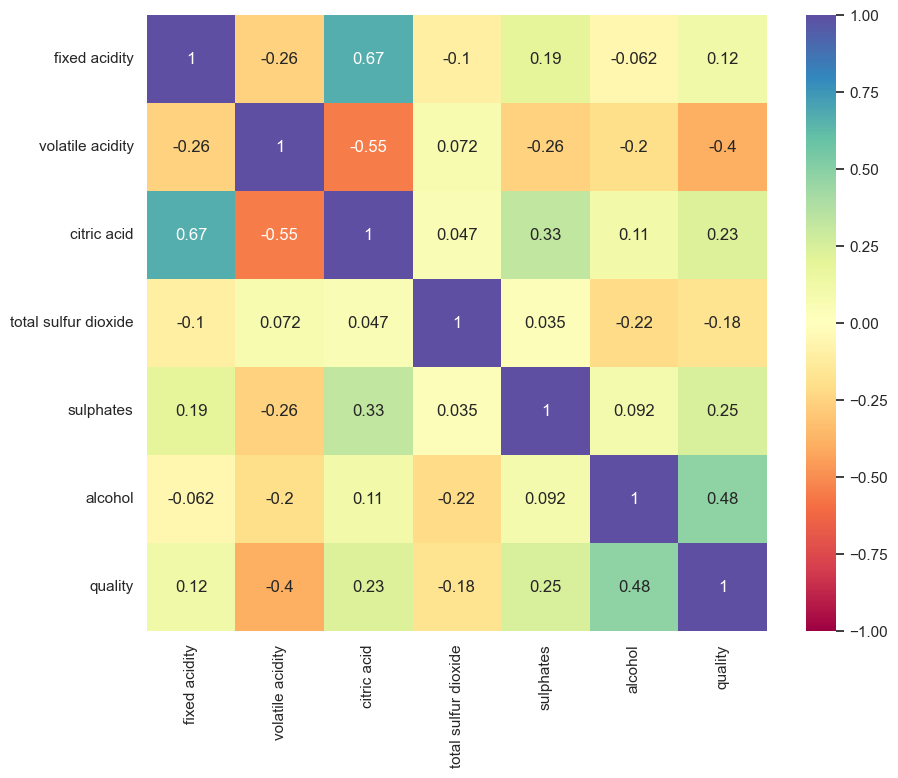

In [374]:
plt.figure(figsize=(10,8))
sns.heatmap(winequality.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

#### Korelasi 

In [375]:
corelation = winequality.corr()["quality"].sort_values()
corelation

volatile acidity       -0.395214
total sulfur dioxide   -0.177855
fixed acidity           0.119024
citric acid             0.228057
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

#### Scalling

Scaling digunakan untuk merubah skala pada data. Penggunaan scaling dapat membantu mengurangi gap antar kolom dalam data, proses ini tidak merubah distribusi dalam data, hanya melakukan pengubahan skala data.

In [376]:
# Scale data
scaler = StandardScaler()
scaled_wine_quality = scaler.fit_transform(winequality)
scaled_wine_quality

array([[-0.52443096,  0.93200015, -1.39325797, ..., -0.57856134,
        -0.95437429, -0.7570404 ],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.12482157,
        -0.5845748 , -0.7570404 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.05102416,
        -0.5845748 , -0.7570404 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  0.59374351,
         0.7097234 ,  0.45762065],
       [-1.38831178,  0.63139451, -0.77933603, ...,  0.3006673 ,
        -0.21477532, -0.7570404 ],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.00759108,
         0.52482366,  0.45762065]])

In [377]:
# Membuat dataframe dari hasil scalling
scaled_wine_quality = pd.DataFrame(scaled_wine_quality, columns=winequality.columns)
scaled_wine_quality


,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol,quality
0,-0.524431,0.932000,-1.393258,-0.384050,-0.578561,-0.954374,-0.757040
1,-0.294063,1.915800,-1.393258,0.604073,0.124822,-0.584575,-0.757040
2,-0.294063,1.259934,-1.188617,0.214813,-0.051024,-0.584575,-0.757040
3,1.664067,-1.363534,1.471711,0.394471,-0.461331,-0.584575,0.457621
4,-0.524431,0.713378,-1.393258,-0.204391,-0.578561,-0.954374,-0.757040
...,...,...,...,...,...,...,...
1354,-0.869983,0.494756,-0.983977,-0.264277,0.945435,-0.861924,0.457621
1355,-1.215536,0.385444,-0.983977,-0.084619,-0.461331,0.062574,-0.757040
1356,-1.388312,0.112167,-0.881656,0.124983,0.593744,0.709723,0.457621
1357,-1.388312,0.631395,-0.779336,-0.084619,0.300667,-0.214775,-0.757040


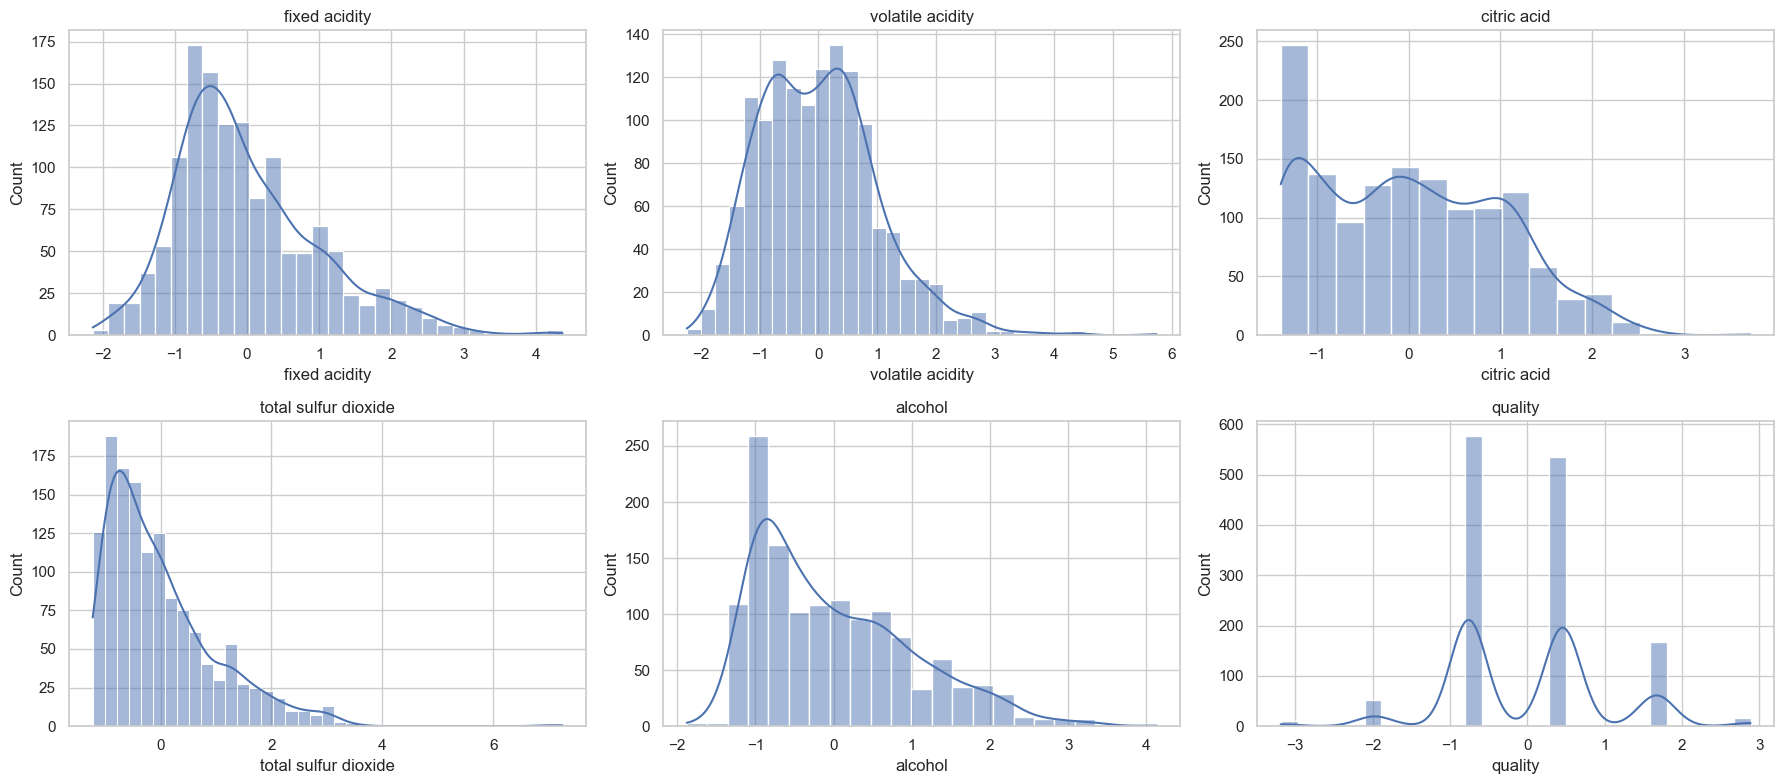

In [378]:
scaled_wine_quality.columns = scaled_wine_quality.columns.str.strip()

cols = ["fixed acidity", "volatile acidity", "citric acid",
        "total sulfur dioxide", "alcohol", "quality"]  

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.ravel()

for i, c in enumerate(cols):
    sns.histplot(scaled_wine_quality[c], kde=True, ax=axes[i])
    axes[i].set_title(c)

# Sembunyikan slot terakhir jika tidak terpakai
if len(cols) < len(axes):
    axes[len(cols)].set_visible(False)

plt.tight_layout(); plt.show()


## Membangun Model Regresi

### Train Test Split

Proses ini merupakan proses pembagian data dalam bentuk, train (untuk membangun model), dan test (untuk testing dari model yang terbentuk) dengan pembagian 70% data train dan 30% data test

In [379]:
X = scaled_wine_quality.drop("quality", axis=1).values
y = scaled_wine_quality["quality"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [380]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  951
Ukuran X test  408
Ukuran y train  951
Ukuran y test  408


### Membangun model dengan package Statsmodels

In [381]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [382]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [383]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     99.02
Date:                Sun, 09 Nov 2025   Prob (F-statistic):           1.41e-96
Time:                        15:04:16   Log-Likelihood:                -1111.6
No. Observations:                 951   AIC:                             2237.
Df Residuals:                     944   BIC:                             2271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.025      0.068      0.9